# 机器学习练习 1 - 线性回归(line regression)

## **单变量线性回归**

在本练习的这一部分中, 您将使用一个变量实现线性回归, 以预测食品卡车的道具。假设你是一个餐厅的CEO, 并正在考虑开放一个在不同城市的新的网点。该连锁企业已经在各个城市拥有卡车, 你有来自城市的道具和人口的数据（ex1data1.txt）。你需要使用这些数据来帮助你选择哪座城市去扩展。这个文件包含了线性回归问题的数据集。第一列是一个城市的人口，第二列该城市的食品卡车的利润。负值代表负利润，正直代表正利润。

导入相应的包

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

读取数据，使用 head 显示数据的前 5 行

In [5]:
path =  'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
描述数据，包括计数，平均值，标准差，最小值，最大值以及较低的百分位数和50等

SyntaxError: invalid character in identifier (<ipython-input-6-18ff6915f031>, line 1)

In [7]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [8]:
绘制散点图，数据可视化

SyntaxError: invalid character in identifier (<ipython-input-8-32281c3cead0>, line 1)

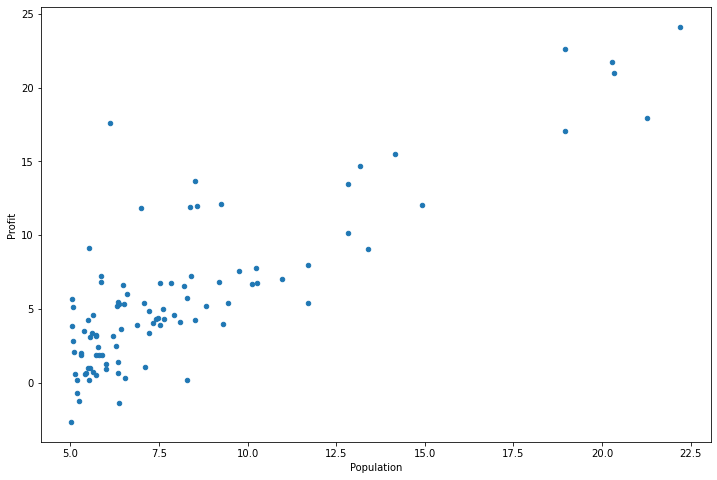

In [9]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

现在使用梯度下降来实现线性回归，在这里创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\$$

In [10]:
def computeCost(X, y, theta):
    inner = np.power((X * theta.T - y), 2)
    return np.sum(inner)/(2 * len(X))

在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度

In [11]:
data.insert(0, 'Ones', 1)

In [12]:
变量初始化

NameError: name '变量初始化' is not defined

In [13]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1] #X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols] #y是所有行，最后一列

In [14]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [15]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy矩阵，所以转换X和y并初始化theta

In [16]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [17]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算损失函数

In [18]:
computeCost(X, y, theta)

32.072733877455676

## batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$


In [19]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) #为了使theta同步更新
    parameters = int(theta.ravel().shape[1]) # 把theta展开为一维，确定有几个参数
    cost = np.zeros(iters) # 迭代次数
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp # 更新theta,同步更新
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

初始化学习率和迭代次数

In [20]:
alpha = 0.01
iters = 1000

In [21]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g #得到的theta

matrix([[-3.24140214,  1.1272942 ]])

In [22]:
computeCost(X, y, g)

4.515955503078912

绘制模型及数据，观察拟合效果

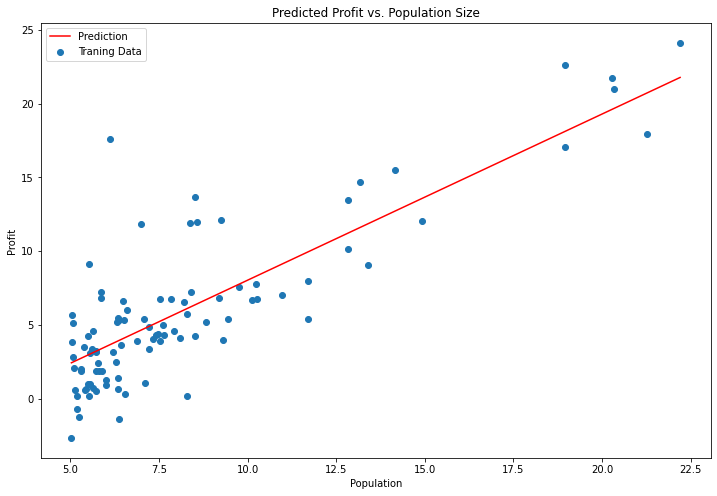

In [23]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

画图看看收敛效果

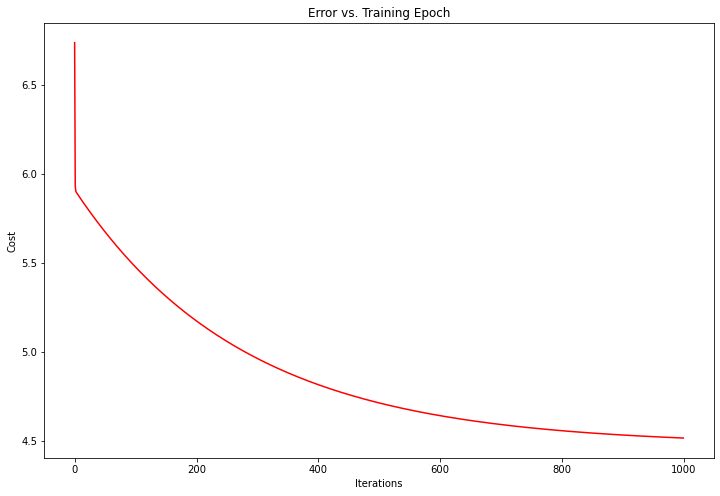

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## **多变量线性回归**

ex1data2.txt是一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。

In [25]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path,header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [26]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


数据归一化

In [27]:
data2 = (data2-data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [28]:
data2.insert(0, 'One', 1)
col = data2.shape[1]
X2 = data2.iloc[:, 0 : col-1]
y2 = data2.iloc[:, col-1 : col]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0, 0, 0]))

g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.1307033696077189

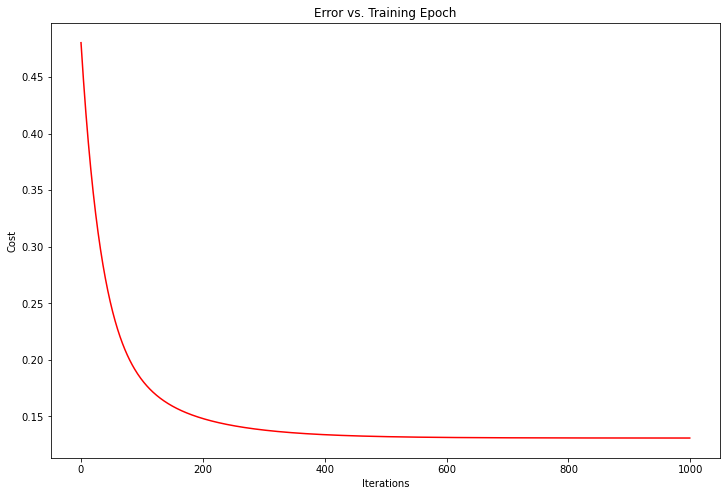

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## **normal equation（正规方程）**
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [30]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [31]:
final_theta2=normalEqn(X, y)
final_theta2 # 和梯度下降得到的结果略有不同

matrix([[-3.89578088],
        [ 1.19303364]])

In [32]:
# 梯度下降的theta: matrix([[-3.24140214,  1.1272942 ]])